In [1]:
from ca_utils import io
from ca_utils.roi import plot
import matplotlib.pyplot as plt
import xarray as xr


plt.style.use('ncb.mplstyle')

## Specify the recording session you want to analyse

In [2]:
data_file = "dat/20240926/20240926_006"
# data_file = "dat/20241010/20241010_028"

s = io.Session(data_file)
s.log

,"(stimFileName, left sound (ao0))","(stimFileName, right sound (ao1))","(stimFileName, start trigger)","(stimFileName, stop trigger)","(stimFileName, next trigger)","(silencePre, left sound (ao0))","(silencePre, right sound (ao1))","(silencePre, start trigger)","(silencePre, stop trigger)","(silencePre, next trigger)",...,frame_zpos,pixels_zpos,left sound (ao0)_onset_ms,left sound (ao0)_offset_ms,left sound (ao0)_onset_frame,left sound (ao0)_offset_frame,right sound (ao1)_onset_ms,right sound (ao1)_offset_ms,right sound (ao1)_onset_frame,right sound (ao1)_offset_frame
trial,,,,,,,,,,,,,,,,,,,,,
0,pulseTrain_16PDUR_20PPAU_128PNUM_250PCAR.wav,pulseTrain_16PDUR_20PPAU_128PNUM_250PCAR.wav,SI_START,SI_STOP,SI_NEXT,10000,10000,10000,10000,10000,...,"[0.02469032069116858, 0.024982230641324113, 0....",None,10002.4,14585.2,299,436,10002.4,14585.2,299,436
1,pulseTrain_16PDUR_20PPAU_128PNUM_250PCAR.wav,pulseTrain_16PDUR_20PPAU_128PNUM_250PCAR.wav,SI_START,SI_STOP,SI_NEXT,10000,10000,10000,10000,10000,...,"[0.02488679468240494, 0.025028765256519064, 0....",None,10002.1,14585.3,300,437,10002.1,14585.2,300,437
2,pulseTrain_16PDUR_20PPAU_128PNUM_250PCAR.wav,pulseTrain_16PDUR_20PPAU_128PNUM_250PCAR.wav,SI_START,SI_STOP,SI_NEXT,10000,10000,10000,10000,10000,...,"[0.024981240543829577, 0.02490555005936228, 0....",None,10001.2,14585.3,299,437,10001.2,14585.3,299,437


## Define ROIs in the GUI
Executing the next cell will open a GUI window that shows the imaging data, allows you to draw ROIs and preview dF/F traces.

Instructions:
- click on the image to create a square roi
- move the roi by dragging and dropping it in the center
- add more hangles/edges by single clicking on a line
- remove handle by right clicking on a handle
- delete the roi by left clicking in the center

In [3]:
!python -m ca_utils.roi.gui {data_file}

^C
Traceback (most recent call last):
  File "signature_bootstrap.py", line 83, in bootstrap
  File "<frozen importlib._bootstrap>", line 1360, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1331, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 935, in _load_unlocked
  File "signature_bootstrap.py", line 194, in exec_module
  File "shibokensupport/signature/loader.py", line 75, in <module>
  File "<frozen importlib._bootstrap>", line 1360, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1331, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 935, in _load_unlocked
  File "signature_bootstrap.py", line 194, in exec_module
  File "shibokensupport/feature.py", line 24, in <module>
  File "/Users/janc/miniconda3/envs/ca/lib/python3.12/inspect.py", line 1355, in <module>
    FullArgSpec = namedtuple('FullArgSpec',
                  ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/janc/miniconda3/envs/ca/lib/python3.12/coll

Fix GUI:
- traces should reflect current channel

## Load imaging data for first trial

In [4]:
trial = s.stack(trial_number=0)
display(trial.attrs['stim_info'])
trial

,name,onset_seconds,offset_seconds,intensity
sound (ao0),pulseTrain_PDUR16ms_PPAU0ms_PCAR250Hz_TDUR4s.wav,5.0022,9.0292,3.0


<xarray.DataArray (time: 42, z: 10, x: 512, y: 512, channel: 1)> Size: 220MB
array([[[[[  44],
          [  48],
          [  96],
          ...,
          [ -18],
          [   3],
          [  41]],

         [[ -23],
          [ -94],
          [-160],
          ...,
          [ -14],
          [ -44],
          [-125]],

         [[ -74],
          [   2],
          [ -73],
          ...,
...
          ...,
          [   7],
          [ 101],
          [ 131]],

         [[  42],
          [  86],
          [ 122],
          ...,
          [   3],
          [  56],
          [4207]],

         [[ -29],
          [-131],
          [-148],
          ...,
          [ -69],
          [ -39],
          [-100]]]]], dtype=int16)
Coordinates:
  * time     (time) float64 336B 0.0003 0.3 0.6004 0.9338 ... 12.94 13.27 13.6
  * z        (z) int64 80B 0 1 2 3 4 5 6 7 8 9
  * channel  (channel) <U5 20B 'gcamp'
Dimensions without coordinates: x, y
Attributes: (12/53)
    ('stimFileName', 'sound (ao0)'):    pulseTrain_PDUR16ms_PPAU0ms_PCAR250Hz...
    ('stimFileName', 'start trigger'):  SI_START
    ('stimFileName', 'stop trigger'):   SI_STOP
    ('stimFileName', 'next trigger'):   SI_NEXT
    ('silencePre', 'sound (ao0)'):      5000
    ('silencePre', 'start trigger'):    5000
    ...                                 ...
    pixels_zpos:                        None
    sound (ao0)_onset_ms:               5002.2
    sound (ao0)_offset_ms:              9029.199999999999
    sound (ao0)_onset_frame:            151
    sound (ao0)_offset_frame:           272
    stim_info:                                                               ...

## Load ROIs

In [5]:
rois = xr.open_dataset(f"{data_file}_rois.h5")['rois']
rois

<xarray.DataArray 'rois' (z: 10, x: 512, y: 512, roi: 3)> Size: 8MB
[7864320 values with dtype=bool]
Dimensions without coordinates: z, x, y, roi

## Plot ROI shapes

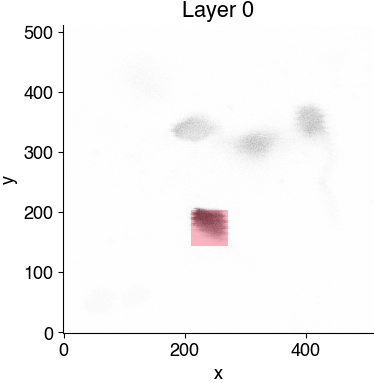

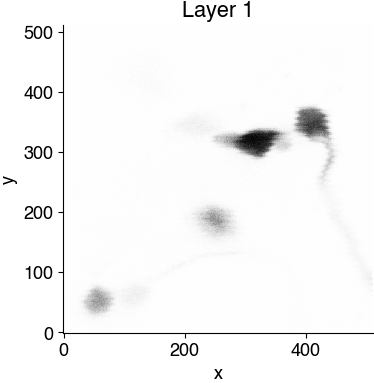

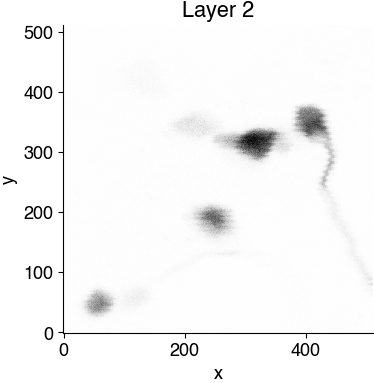

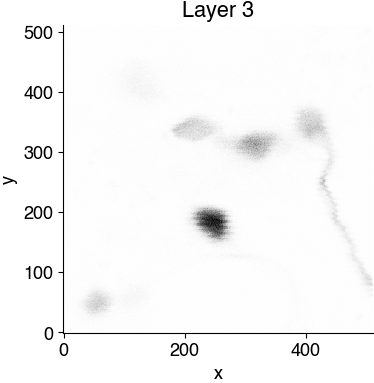

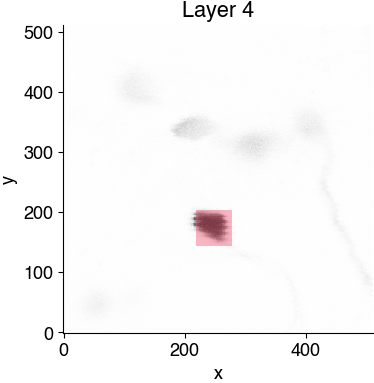

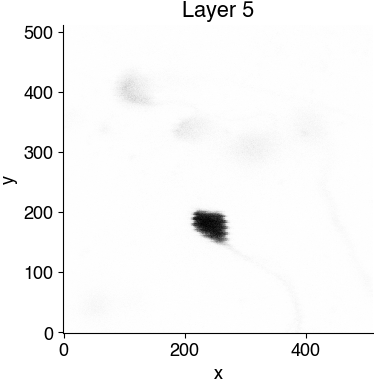

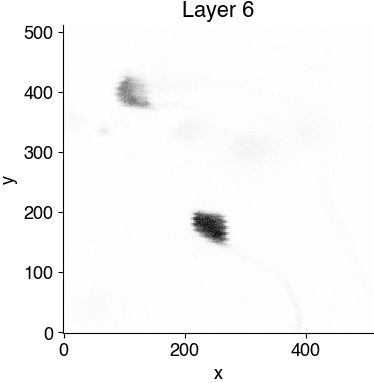

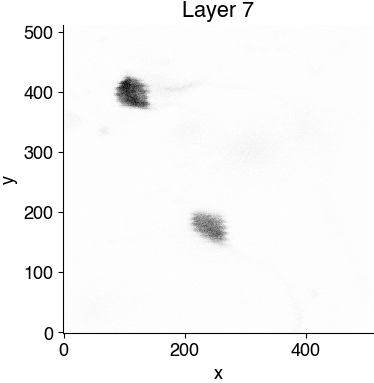

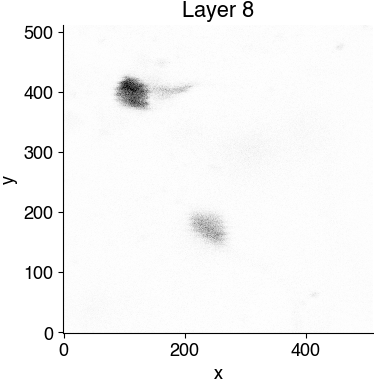

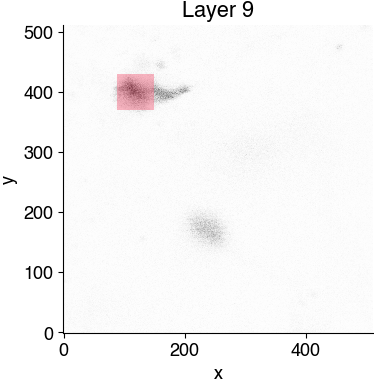

In [6]:
nb_layers = len(trial.z)

for layer in range(nb_layers): # need to specify a z-layer, use the first layer by default

    background = trial.mean(dim='time').sel(channel='gcamp', z=layer)  # compute time averaged frame as background
    plt.figure(figsize=(4,4))
    plot.plot_rois(rois, layer, background)
    plt.title(f"Layer {layer}")
    plt.show()

## Calculate and plot raw fluorescence traces

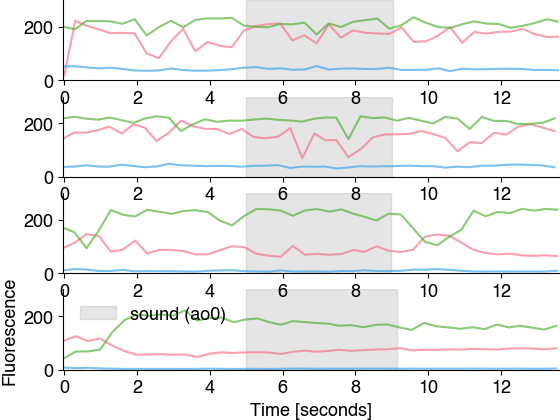

In [7]:
traces = plot.extract_traces(s, rois)

fig, axs = plt.subplots(nrows=s.nb_trials, sharey=True)

all_xlims = []
which_stim = 'sound (ao0)'
for trial_number in range(s.nb_trials):
    trace = traces[trial_number].sel(channel='gcamp')
    stim_info = trace.attrs['stim_info']
    time = traces[trial_number].time
    axs[trial_number].plot(time, trace, alpha=0.67)
    axs[trial_number].axvspan(stim_info.loc[which_stim]['onset_seconds'],
                              stim_info.loc[which_stim]['offset_seconds'],
                              color='k', alpha=0.1, label=which_stim)
    axs[trial_number].set_xlim(time[0], time[-1])
    all_xlims.extend(axs[trial_number].get_xlim())
axs[trial_number].set_xlabel('Time [seconds]')
axs[trial_number].set_ylabel('Fluorescence')
[ax.set_xlim(min(all_xlims), max(all_xlims)) for ax in axs]
axs[trial_number].legend()
plt.show()

## Calculate and plot dF/F

<>:18: SyntaxWarning: invalid escape sequence '\D'
<>:18: SyntaxWarning: invalid escape sequence '\D'
/var/folders/bc/5m_c7nkj1vnc2w7xmmnhpfww0000gn/T/ipykernel_98786/1213782929.py:18: SyntaxWarning: invalid escape sequence '\D'
  axs[trial_number].set_ylabel('$\Delta$F/F')


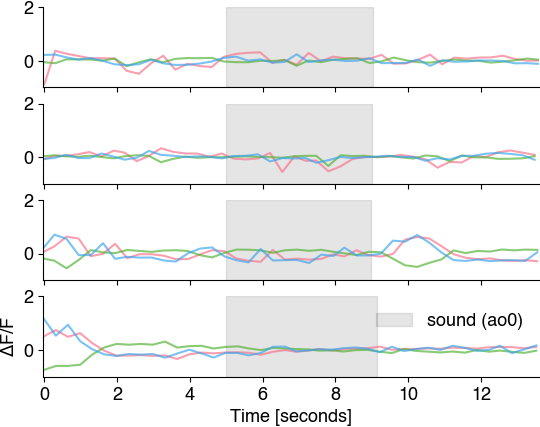

In [8]:
traces_dff = plot.dff(traces, f0_seconds=(0, 10))

fig, axs = plt.subplots(nrows=s.nb_trials, sharex=True, sharey=True)

all_xlims = []
which_stim = 'sound (ao0)'
for trial_number in range(s.nb_trials):
    trace = traces_dff[trial_number].sel(channel='gcamp')
    stim_info = trace.attrs['stim_info']
    time = traces[trial_number].time
    axs[trial_number].plot(time, trace, alpha=0.67)
    axs[trial_number].axvspan(stim_info.loc[which_stim]['onset_seconds'],
                              stim_info.loc[which_stim]['offset_seconds'],
                              color='k', alpha=0.1, label=which_stim)
    axs[trial_number].set_xlim(time[0], time[-1])
    all_xlims.extend(axs[trial_number].get_xlim())
axs[trial_number].set_xlabel('Time [seconds]')
axs[trial_number].set_ylabel('$\Delta$F/F')
[ax.set_xlim(min(all_xlims), max(all_xlims)) for ax in axs]
axs[trial_number].legend()
plt.show()

<>:19: SyntaxWarning: invalid escape sequence '\D'
<>:19: SyntaxWarning: invalid escape sequence '\D'
/var/folders/bc/5m_c7nkj1vnc2w7xmmnhpfww0000gn/T/ipykernel_98786/3438636203.py:19: SyntaxWarning: invalid escape sequence '\D'
  axs[trial_number].set_ylabel('$\Delta$F/F')


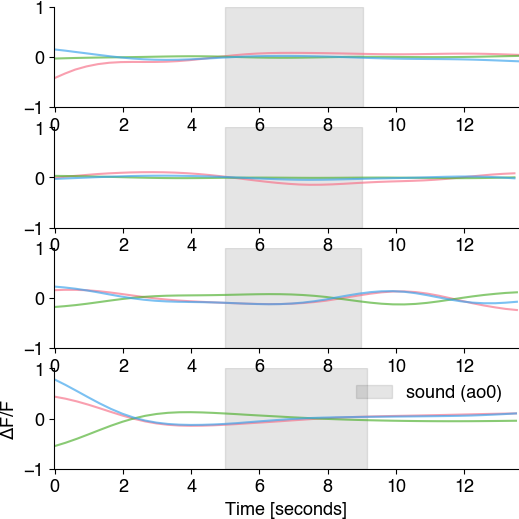

In [10]:
traces_smooth = plot.smooth(traces_dff, sigma=4)

fig, axs = plt.subplots(nrows=s.nb_trials, sharey=True, figsize=(6, 1.5 * s.nb_trials))

all_xlims = []
which_stim = 'sound (ao0)'
for trial_number in range(s.nb_trials):
    trace = traces_smooth[trial_number].sel(channel='gcamp')
    stim_info = trace.attrs['stim_info']
    time = traces[trial_number].time
    axs[trial_number].plot(time, trace, alpha=0.67)
    axs[trial_number].axvspan(stim_info.loc[which_stim]['onset_seconds'],
                              stim_info.loc[which_stim]['offset_seconds'],
                              color='k', alpha=0.1, label=which_stim)
    axs[trial_number].set_xlim(time[0], time[-1])
    all_xlims.extend(axs[trial_number].get_xlim())

axs[trial_number].set_xlabel('Time [seconds]')
axs[trial_number].set_ylabel('$\Delta$F/F')
[ax.set_xlim(min(all_xlims), max(all_xlims)) for ax in axs]
axs[trial_number].legend()
plt.show()




## Alternative way of plotting the stimulus

In [ ]:
traces_smooth = plot.smooth(traces_dff, sigma=4)

fig, axs = plt.subplots(nrows=s.nb_trials * 2, height_ratios=[1, 3] * s.nb_trials, figsize=(6, 1.5 * s.nb_trials))

all_ylims = []
all_xlims = []
for trial_number in range(s.nb_trials):
    trace = traces_smooth[trial_number].sel(channel='gcamp')
    stim_info = trace.attrs['stim_info']
    time = traces[trial_number].time

    # STIMULUS
    for stim_cnt, (index, row) in enumerate(stim_info.iterrows()):
        print(index)
        axs[trial_number * 2].fill_between([row['onset_seconds'], row['offset_seconds']],
                                      y1=stim_cnt-0.5, y2=stim_cnt+0.5,
                                      alpha=0.5)
    axs[trial_number * 2].set_yticks(range(len(stim_info.index)), stim_info.index)
    axs[trial_number * 2].set_ylim(-0.5, len(stim_info.index)-1+0.5)
    axs[trial_number * 2].set_xticks([])

    # TRACES
    axs[trial_number * 2 + 1].plot(time, trace, alpha=0.67)
    axs[trial_number * 2 + 1].plot(time, trace, alpha=0.67)
    axs[trial_number * 2 + 1].set_xlim(time[0], time[-1])
    all_ylims.extend(axs[trial_number * 2 + 1].get_ylim())
    all_xlims.extend(axs[trial_number * 2 + 1].get_xlim())
    if trial_number < s.nb_trials-1:
        axs[trial_number * 2 + 1].set_xticks([])
axs[trial_number * 2 + 1].set_xlabel('Time [seconds]')
axs[trial_number * 2 + 1].set_ylabel('$\Delta$F/F')
axs[trial_number * 2 + 1].legend()

[ax.set_ylim(0.9 * min(all_ylims), 1.1 * max(all_ylims)) for ax in axs[1::2]]
[ax.set_xlim(min(all_xlims), max(all_xlims)) for ax in axs]

# set shared y lims
plt.show()

